<a href="https://colab.research.google.com/github/yuu19/advanced_data_lecture/blob/main/Chap4_Applied_Data_Science_20230519.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ver 1.0

About version：The version is 1.0 when released in the google classroom and it will be updated if there are any changes.

#5. <font color='crimson'>Data handling & Simple Regression</font>

**Point of the Day**:

- Basics of pandas

- Data Manipulation with pandas

- Descriptive Statistics

- Simple regression

So far, we have studied the basics of programmins for data analysis.


## 4.1 <font color='crimson'>pandas</font>

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=1D3mjQd67qgHLQULT_FQWWG9ZpfIzA1GS" width="30%">
</div>

PANDAS is a module that provides functions to support data analysis and is specialized for manipulating and analyzing number tables and time series data.

### <font color='crimson'>Create a DataFrame</font>

You can create a pandas data frame with `pd.DataFrame()`.

First, let's create an empty list.

In [ ]:
# df is commonly used as an abbreviation for dataframe.
import pandas as pd
df = pd.DataFrame()
print(df)

Empty DataFrame
Columns: []
Index: []


Here, `df[column name]` is used to create a new column.

In [ ]:
df['working hours'] = [8, 10, 12, 10]
df['salary'] = [100, 115.5, 130.2, 112]
df

,working hours,salary
0,8,100.0
1,10,115.5
2,12,130.2
3,10,112.0


Here is an interpretation of the pandas Data Frame.

First, unlike `numpy`, pandas can basically handle only two-dimensional matrix data, with the first dimension being <font color='crimson'>index</font> and the second dimension being <font color='crimson'>column</font>.

<div align="center">

<img src="https://drive.google.com/uc?export=view&id=11DkhiIVPJj2j_-hoPR8v_WDMvW4wBBb7" width="40%">
</div>

In [ ]:
# check index and column
print(df.index)
print(df.columns)

RangeIndex(start=0, stop=4, step=1)
Index(['working hours', 'salary'], dtype='object')


As with numpy, the number of rows and columns can be checked with `shape`.

You can't use `reshape()` for pandas.

In [ ]:
print(df.shape)

(4, 2)


Indexes and column names can also be changed.

In [ ]:
df

,working hours,salary
0,8,100.0
1,10,115.5
2,12,130.2
3,10,112.0


In [ ]:
df2 = df.copy() # backup

df2.index = ['day 1', 'day 2', 'day 3', 'day 4']
df2.columns = ['price', 'sales']
display(df2)

,price,sales
day 1,8,100.0
day 2,10,115.5
day 3,12,130.2
day 4,10,112.0


- Compatibility with numpy

PANDAS is also highly compatible with NUMPY, making data conversion easy.

<font color='crimson'> **numpy -> pandas** </font>

In [ ]:
import numpy as np
mat = np.zeros((3,5))
tmp = pd.DataFrame(mat)
display(tmp)

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0


Indexes and column names can also be specified at the data frame creation stage.

In [ ]:
tmp = pd.DataFrame(mat, index=['a','b','c'])
tmp

,0,1,2,3,4
a,0.0,0.0,0.0,0.0,0.0
b,0.0,0.0,0.0,0.0,0.0
c,0.0,0.0,0.0,0.0,0.0


In [ ]:
tmp = pd.DataFrame(mat,index=['a','b','c'], columns=['col1 col2 col3 col4 col5'.split()])
display(tmp)

,col1,col2,col3,col4,col5
a,0.0,0.0,0.0,0.0,0.0
b,0.0,0.0,0.0,0.0,0.0
c,0.0,0.0,0.0,0.0,0.0


<font color='crimson'> **pandas -> numpy** </font>

It can be converted to a numpy array with `np.array()` or `to_numpy()`.

In [ ]:
print(np.array(df))

[[  8.  100. ]
 [ 10.  115.5]
 [ 12.  130.2]
 [ 10.  112. ]]


In [ ]:
print(df.to_numpy())

[[  8.  100. ]
 [ 10.  115.5]
 [ 12.  130.2]
 [ 10.  112. ]]


- Sorting

Use `sort_values` to sort data by the size of the numbers in a column.

Unlike numpy, you can use `ascending=False` to sort in descending order.

In [ ]:
df2

,price,sales
day 1,8,100.0
day 2,10,115.5
day 3,12,130.2
day 4,10,112.0


In [ ]:
display(df2.sort_values('price')) # Low -> High
display(df2.sort_values('price',ascending=False)) # High -> Low

,price,sales
day 1,8,100.0
day 2,10,115.5
day 4,10,112.0
day 3,12,130.2


,price,sales
day 3,12,130.2
day 2,10,115.5
day 4,10,112.0
day 1,8,100.0


### <font color='crimson'>Data Frame manipulation</font>

- There are many ways to retrieve data, but here are a few that are commonly used.

  - Extract a column by df[column name].

  - Extract a column by df.loc[index, column name].

  - Extract data by df.iloc[number of rows, number of columns].

In [ ]:
df2

,price,sales
day 1,8,100.0
day 2,10,115.5
day 3,12,130.2
day 4,10,112.0


In [ ]:
# df[column name]
print(df2['price'])

day 1     8
day 2    10
day 3    12
day 4    10
Name: price, dtype: int64


In [ ]:
# Multiple columns

lists = ['price']
print(df2[ lists ] )

       price
day 1      8
day 2     10
day 3     12
day 4     10


In [ ]:
print(df2['price'][2]) # 3rd element from column price

12


In [ ]:
df2

,price,sales
day 1,8,100.0
day 2,10,115.5
day 3,12,130.2
day 4,10,112.0


In [ ]:
# df.loc[index, column name]

print(df2.loc['day 1', 'sales'])

print('\nIndex')
print(df2.loc['day 1'])

print('\nColumn')
print(df2.loc[:,'sales'])

100.0

Index
price      8.0
sales    100.0
Name: day 1, dtype: float64

Column
day 1    100.0
day 2    115.5
day 3    130.2
day 4    112.0
Name: sales, dtype: float64


In [ ]:
# df.iloc[row num, col num]

print(df2.iloc[0,1]) # row 0, column 1
print(df2.iloc[1]) # all columns from row 1

100.0
price     10.0
sales    115.5
Name: day 2, dtype: float64


In [ ]:
df2.iloc[1:]

,price,sales
day 2,10,115.5
day 3,12,130.2
day 4,10,112.0


Besides, you can extract specific rows with some conditions.

In [ ]:
df2[df2['sales'] > 110]

,price,sales
day 2,10,115.5
day 3,12,130.2
day 4,10,112.0


- Deleting rows and columns

Use `.drop()` to delete a matrix in a data frame.

In [ ]:
df3 = df2.copy()
display(df3)

,price,sales
day 1,8,100.0
day 2,10,115.5
day 3,12,130.2
day 4,10,112.0


In [ ]:
tmp = df3.drop('price', axis=1) # Delete column
display(tmp)

,sales
day 1,100.0
day 2,115.5
day 3,130.2
day 4,112.0


In [ ]:
tmp = df3.drop('day 1', axis=0) # Delete row
display(tmp)

,price,sales
day 2,10,115.5
day 3,12,130.2
day 4,10,112.0


- Concatenation

Multiple pandas DataFrames can be combined with `pd.concat()`.

In [ ]:
display(dfa)

,0,1
0,0.0,0.0
1,0.0,0.0


In [ ]:
import pandas as pd

dfa = pd.DataFrame(np.zeros((2,2)))
dfb = pd.DataFrame(np.ones((2,2)))
dfc = pd.DataFrame(np.ones((2,2)) + 1 )

display(dfa, dfb, dfc)

,0,1
0,0.0,0.0
1,0.0,0.0


,0,1
0,1.0,1.0
1,1.0,1.0


,0,1
0,2.0,2.0
1,2.0,2.0


In [ ]:
pd.concat([dfa, dfb, dfc], axis=1)

,0,1,0,1,0,1
0,0.0,0.0,1.0,1.0,2.0,2.0
1,0.0,0.0,1.0,1.0,2.0,2.0


In [ ]:
import numpy as np
import pandas as pd

dfa = pd.DataFrame(np.zeros((2,2)))
dfb = pd.DataFrame(np.ones((2,2)))
dfc = pd.DataFrame(np.ones((2,2)) + 1 )

# Concat by row
display(pd.concat([dfa, dfb, dfc])) # default: axis=0
# Concat by column
display(pd.concat([dfa, dfb, dfc], axis=1))

,0,1
0,0.0,0.0
1,0.0,0.0
0,1.0,1.0
1,1.0,1.0
0,2.0,2.0
1,2.0,2.0


,0,1,0,1,0,1
0,0.0,0.0,1.0,1.0,2.0,2.0
1,0.0,0.0,1.0,1.0,2.0,2.0


The concat created multiple identical indexes and column names. This is undesirable, so set `ignore_index=True` when merging.

In [ ]:
dfx1 = pd.concat([dfa, dfb, dfc])
display(dfx1)

dfx2 = pd.concat([dfa, dfb, dfc], ignore_index=True)
display(dfx2)

,0,1
0,0.0,0.0
1,0.0,0.0
0,1.0,1.0
1,1.0,1.0
0,2.0,2.0
1,2.0,2.0


,0,1
0,0.0,0.0
1,0.0,0.0
2,1.0,1.0
3,1.0,1.0
4,2.0,2.0
5,2.0,2.0


### <font color='crimson'>Descriptive Statistics</font>

Pandas has a variety of descriptive statistics more easily than numpy.

- `describe()`

for each column, various aggregates and statistics are output at once.

In [ ]:
display(df2.describe())

,price,sales
count,4.000000,4.00000
mean,10.000000,114.42500
std,1.632993,12.43607
min,8.000000,100.00000
25%,9.500000,109.00000
50%,10.000000,113.75000
75%,10.500000,119.17500
max,12.000000,130.20000


Similar to numpy, we can easiliy compute the mean, standard deviation using pandas.

In [ ]:
display(df2.mean()) # mean

price     10.000
sales    114.425
dtype: float64

In [ ]:
display(df2.mean(axis=1)) # mean by row

day 1    54.00
day 2    62.75
day 3    71.10
day 4    61.00
dtype: float64

In [ ]:
display(df2.std()) # standard deviation

price     1.632993
sales    12.436070
dtype: float64

### <font color='crimson'>**[Practice 1] pandas operation** (20 mins)</font>

1. make 16 random samples from a uniform distribution of $U(30,100)$, and reshape as ($8 \times 2$), named `mat`.

2. Store in a $(4 \times 2)$ dimensional matrix $A$, constructed with odd numbered rows, and $B$, constructed with even numbered rows from the `mat`, respectively.

1. Rename the column names of the matrix $A$ created above as 'Mathematics', 'Chemistry', and the column names of $B$ as 'English', 'Japanese'.

1. Concat $A$,$B$ in the column direction and print.

1. Arrange the entire data frame in descending order based on the 'chemistry' value.

★Challenge★

5. Total Scores: Add a column called 'Total Scores' to calculate and enter the total scores for each student (row).

1. Arrange the entire data frame in descending order based on the total scores.

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(0)
# step 1 : generate random numbers
mat = np.random.uniform(30, 100, 16).reshape(8, 2)
print(mat)

# Step 2 : DataFrame
coln = ['Mathematics', 'Chemistry','English', 'Japanese']
A = pd.DataFrame(mat[[i for i in range(mat.shape[0]) if i%2 == 0]], columns = coln[:2] )
B = pd.DataFrame(mat[[i for i in range(mat.shape[0]) if i%2 != 0]], columns = coln[2:])

display(A)
display(B)

# Step 3: Concat
df = pd.concat([A,B], axis=1)
display(df)

# Sort

df.sort_values('Chemistry', ascending=False)

[[68.41694527 80.06325565]
 [72.19343633 68.14182281]
 [59.65583595 75.21258791]
 [60.63110479 92.42411005]
 [97.45639324 56.84090632]
 [85.42075267 67.02264438]
 [69.76311928 94.79176468]
 [34.97252407 36.09905098]]


,Mathematics,Chemistry
0,68.416945,80.063256
1,59.655836,75.212588
2,97.456393,56.840906
3,69.763119,94.791765


,English,Japanese
0,72.193436,68.141823
1,60.631105,92.424110
2,85.420753,67.022644
3,34.972524,36.099051


,Mathematics,Chemistry,English,Japanese
0,68.416945,80.063256,72.193436,68.141823
1,59.655836,75.212588,60.631105,92.424110
2,97.456393,56.840906,85.420753,67.022644
3,69.763119,94.791765,34.972524,36.099051


,Mathematics,Chemistry,English,Japanese
3,69.763119,94.791765,34.972524,36.099051
0,68.416945,80.063256,72.193436,68.141823
1,59.655836,75.212588,60.631105,92.424110
2,97.456393,56.840906,85.420753,67.022644




<div align="center">

<img src="https://drive.google.com/uc?export=view&id=11F4x9aQZeEvwHMBMQAMrn6Tg6gjNhXxD" width="100%">

**実践の全体像**
</div>

In [ ]:
import numpy as np
import pandas as pd

np.random.seed(0)

# Write from here


### <font color='crimson'>Reading data</font>

Basically, `pd.read_xxx()` can be used to read files locally or on the net.

Commonly used data files are in addition to `csv`, which separates data with commas,


  - tab-separated `tsv`.

  <font color='crimson'>**If the file is tab-seperated, then add `sep='\t'`, like `pd.read_csv(file, sep='\t')`**</font>
  
  - text file `txt`.
  
  - Compressed files `gz`, and so on.

First, let's read the tvmarketing file.

Note that TV column means the cost for the TV promotion.

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/dgod1028/Research/main/data/tvmarketing.csv')
display(df)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
...,...,...
195,38.2,7.6
196,94.2,9.7
197,177.0,12.8
198,283.6,25.5


All data is read, although some is omitted.

If you look closely, you will see that `unnamed: 0` is included. This is because pandas assumes that the basic data does not contain any indexes when it reads the data. If your data contains indexes, you should specify them with `index_col=number of columns`.



- `head()`, `tail()`

You can display some data from the front of the line and some from the back.

In [ ]:
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [ ]:
df.head(10)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9
5,8.7,7.2
6,57.5,11.8
7,120.2,13.2
8,8.6,4.8
9,199.8,10.6


In [ ]:
df.tail(3)

,TV,Sales
197,177.0,12.8
198,283.6,25.5
199,232.1,13.4


If you want to set the index using one of the column when reading csv, use `index_col=column number`.

In [ ]:
import pandas as pd

# Set first column as index
tmp = pd.read_csv('https://raw.githubusercontent.com/dgod1028/Research/main/data/tvmarketing.csv', index_col=0)
display(tmp)

,Sales
TV,
230.1,22.1
44.5,10.4
17.2,9.3
151.5,18.5
180.8,12.9
...,...
38.2,7.6
94.2,9.7
177.0,12.8


But this is not necessary for this datset.

Next, let's visualize the relationship between `TV` and `Sales`.

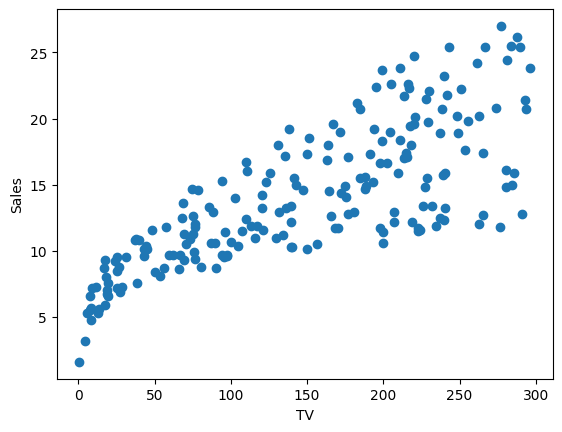

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

## 4.2 <font color='crimson'>Regression Analysis</font>



### <font color='crimson'>Introduction</font>

Once you know the basics of DataFrame, you are finally ready to do regression analysis.

The estimation in basic regression analysis does not need to be written by you, and you can easily do OLS estimation and see the results in a python module.

As a supervised-learning, all you need to do is prepare the basic **independent(explanatory) variable X** and the **target variable y** for the regression task.

$$
Y = f(X)
$$

$\boldsymbol{X}$ is $(N \times P)$ matrix, Y is one-dimensional array with $(N)$ elements ($\boldsymbol{Y}$ can be a matrix like $(N \times K)$ if you have more than one target variables. For simplicity, we assume $\boldsymbol{Y}$ is one-dimensional data in this class.)


### <font color='crimson'>Linear Regression</font>

Here is a simple linear regression form.

<br><br>
\begin{eqnarray}
\boldsymbol{Y} = \boldsymbol{a}\boldsymbol{X}+\boldsymbol{b}+u
\end{eqnarray}
<br>

The following is a summary of the results of the analysis. where $\boldsymbol{Y}$ is the target variable, $\boldsymbol{X}$ is the independent variable, $\boldsymbol{a}$ and $\boldsymbol{b}$ are the regression coefficients ($\boldsymbol{b}$ is also called **intercept**) and $u$ is the error term.


Let's do the regression with the dataset we showed above.

In [ ]:
import pandas as pd
import numpy as np

df

,Mathematics,Chemistry,English,Japanese
0,68.416945,80.063256,72.193436,68.141823
1,59.655836,75.212588,60.631105,92.424110
2,97.456393,56.840906,85.420753,67.022644
3,69.763119,94.791765,34.972524,36.099051


We will use the `sklearn` module for this regression.



In [ ]:
from sklearn.linear_model import LinearRegression # Import Linear regression

linear = LinearRegression() # Define
linear.fit(X=df[['TV']], y=df['Sales'])  # Estimate


LinearRegression()

Note that in `linear.fit(X,y)`, X should be 2-dimensional matrix, so even we only have one variable, we need to use df[['TV']] to keep the X as a matrix.

In [ ]:
# Different
print(df['TV'].shape)
print(df[['TV']].shape)

(200,)
(200, 1)


- `linear.intercept_`, `linear.coef_`

For linear model, we can observe the estimated coefficients and intercept.

In [ ]:
# Intercept
linear.intercept_

7.032593549127695

In [ ]:
# Coefficient
linear.coef_

array([0.04753664])

It means this model has the form
$$
\hat{Sales} = 7.033 + 0.048 * TV
$$

$\hat{Sales}$ means predicted sales.

To perform a basic linear regression analysis,

1. prepare an $X$ matrix of $(N \times P)$.

1. prepare a one-dimensional $y$ array of $(N)$.

Estimate the prepared X,y with the following code and output.

`model = LinearRegression()`

`result = model.fit(X, y)`


3. Analyze the results.

This is the above process.

Data preprocessing, forecasting, and evaluation will be covered in the next class.



### <font color='crimson'>**[Practice 2]Compute coefficients with matrix operations** (10 mins)</font>

The coefficient estimates computed above can also be done through matrix calculations.

$$ X b^T = y $$

$$ (X^T X)^{-1}X^T X b^T = (X^T X)^{-1}X^T y$$

$$ b^T = (X^T X)^{-1}X^T y $$

Calculate $b$ with $X$ and $y$ generated above.

<font color='crimson'>Hint：</font>

$X$ **must** include an intercept term. Just concat a column with all of the elements are 1.

e.g.,

Data:

[ 1,

  2,

  3]

Data with intercept:

[ 1, 1,

  1, 2,

  1, 3]

In [ ]:
# Task 2
X = df[['TV']]
X['const'] = 1
y = df['Sales']
display(X,y)

np.linalg.inv( X.T.dot(X)).dot(X.T).dot(y)

,TV,const
0,230.1,1
1,44.5,1
2,17.2,1
3,151.5,1
4,180.8,1
...,...,...
195,38.2,1
196,94.2,1
197,177.0,1
198,283.6,1


0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

array([0.04753664, 7.03259355])

array([0.04753664, 7.03259355])

In [ ]:
X

,TV,const
0,230.1,1
1,44.5,1
2,17.2,1
3,151.5,1
4,180.8,1
...,...,...
195,38.2,1
196,94.2,1
197,177.0,1
198,283.6,1


### <font color='crimson'>Forecast</font>

You can perform forecasting using `predict()` with trained model.

We create new data first.

In [ ]:
newdf = pd.DataFrame([[1], [2]], columns=['TV'] )
newdf

,TV
0,1
1,2


Then predict for the sales use `predict()`.

In [ ]:
preds = linear.predict(newdf)
preds

array([7.08013019, 7.12766683])

These are the predicted sales when TV are 1 and 2, respectively.

We can also make prediction with original data.

In [ ]:
preds = linear.predict(df[['TV']])
preds

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431,
       10.17476548, 17.23871025,  8.16396559, 11.66741599, 16.73482186,
       16.32125309, 10.25557777, 20.40940417, 10.32212907, 14.03474068,
       17.41459582, 18.31779199,  7.6600772 , 17.88520856,  9.99412625,
       19.52997632, 13.82557947, 18.44614092, 18.85970969, 10.38868036,
       20.95607553, 12.39948025, 11.653155  , 19.65832525, 11.58185004,
       20.85149492, 19.72012288, 10.58358059,  9.08142275, 17.87094757,
       16.65876324, 15.44657891, 20.98935118, 16.86792445,  8.22576322,
       15.35625929, 11.2966302 , 18.43663359, 17.83291826, 10.21279479,
       16.53041431, 11.80527225, 17.31952254, 15.71278409, 19.52046899,
       16.48763133,  7.37961102, 13.50708398, 17.05331735, 17.04856369,
        9.57580381, 19.45391769, 18.4081116 , 11.91460652, 13.26464711,
       10.31262174,  8.52999772, 13.65444756, 18.31779199, 17.33

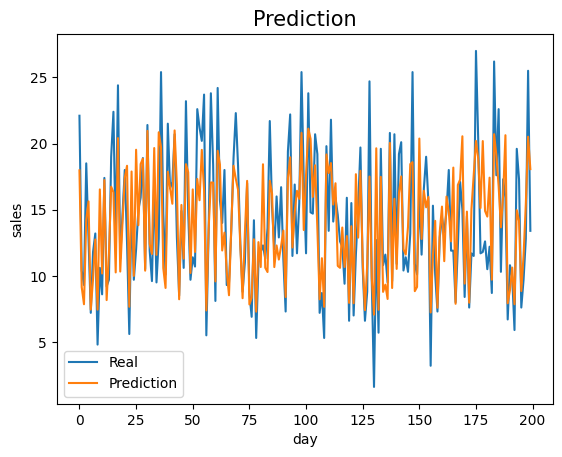

In [ ]:
plt.plot(df['Sales'])
plt.plot(preds)
plt.legend(['Real','Prediction'])
plt.title('Prediction', fontsize=15)
plt.xlabel('day')
plt.ylabel('sales')
plt.show()

If we plot use scatter plot, we can understand the forecasting is based on **linear** structure.

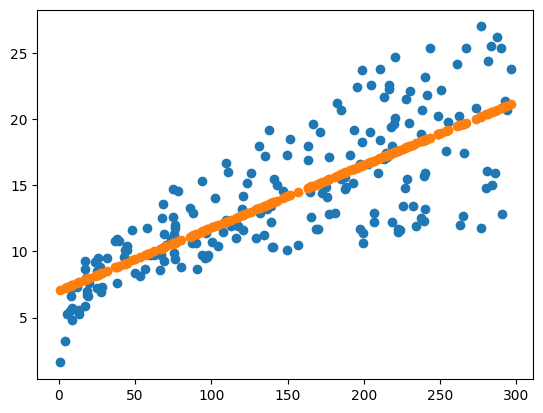

In [ ]:
plt.scatter(df['TV'], df['Sales'])
plt.scatter(df['TV'], preds)
plt.show()

### <font color='crimson'>Nonlinear Regression</font>

The following is a brief overview of the different types of nonlinear regression models. **Non-linear regression models** include a variety of systems, and it is difficult to explain them all in detail in the time available.

**<font color='crimson'>Regression models based on decision trees</font>**

Decision trees will be studied in next week's lecture, but many extended models have been developed, mainly based on **Ensemble Learning**, in which multiple models are created and predictions are made by looking at all the models together. Some well-known models are,

- **Random Forest regression**.

- **Gradient Boosting**

- **XGBoost** <font color='crimson'> <-- This model was used by many data contest winners until a few years ago and is not implemented in **scikit-learn**. Installation of the additional package xgboost is required.

**<font color='crimson'>support vector machine</font>**

Another powerful nonlinear model is the support vector machine. Characteristically, this learning method prevents overlearning by setting an insensitive zone (threshold) for the error, making it less susceptible to noise, and providing an error in the objective variable.

**<font color='crimson'>Neural network</font>**

This is a learning method that includes **Deep Learning**, which we hear a lot about these days (not all neural networks are **Deep Learning**).



We will not learn the algorithm of the nonlinear models, as we do not have enough time for it. Here is a simple case for apply the nonlinear model - **Random Forest Regressor**.

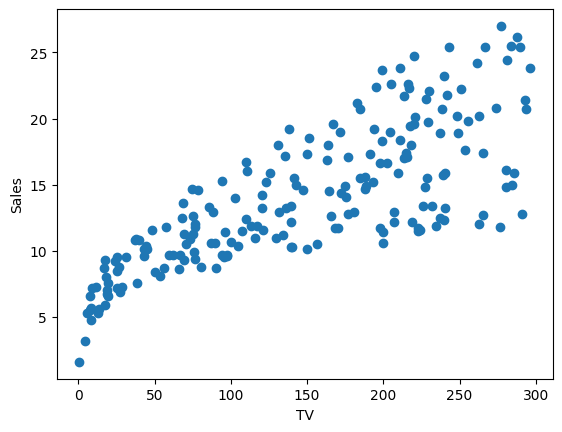

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
# Random Forest
rfr = RandomForestRegressor()

rfr.fit(X=df[['TV']], y=df['Sales'])


RandomForestRegressor()

In [ ]:
preds = rfr.predict(df[['TV']])
preds

array([20.753     , 10.283     ,  7.7899    , 15.742     , 16.24716667,
        6.538     , 10.783     , 13.311     ,  5.482     , 11.99663333,
        9.367     , 17.574     ,  8.682     ,  9.739     , 19.348     ,
       20.85175   , 12.139     , 20.929     , 10.743     , 15.084     ,
       16.915     , 15.9336    ,  5.79      , 17.384     ,  9.579     ,
       14.729     , 14.415     , 15.44455   , 19.602     , 10.637     ,
       20.783     , 12.7831    ,  9.685     , 16.279     , 10.006     ,
       17.3       , 22.033     , 13.525     , 10.055     , 19.724     ,
       17.59033333, 14.89070238, 21.002     , 13.633     ,  8.281     ,
       14.7925    , 10.333     , 19.63675   , 16.879     ,  9.801     ,
       11.99663333, 11.223     , 22.132     , 18.45      , 17.927     ,
       20.40583333,  5.701     , 14.454     , 22.036     , 19.554     ,
        8.341     , 21.115     , 16.02575   , 12.538     , 15.615     ,
        9.903     ,  8.645     , 12.947     , 15.9336    , 22.06

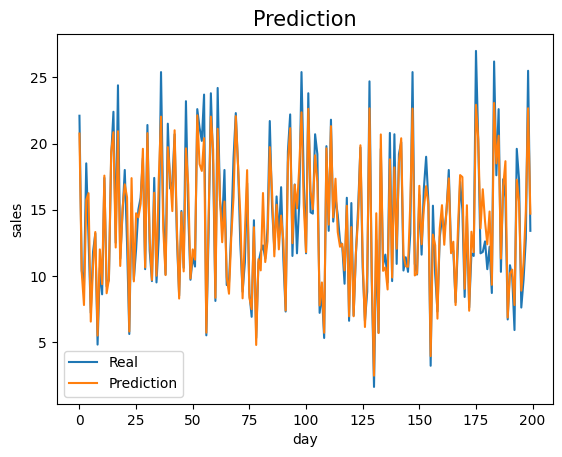

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df['Sales'])
plt.plot(preds)
plt.legend(['Real','Prediction'])
plt.title('Prediction', fontsize=15)
plt.xlabel('day')
plt.ylabel('sales')
plt.show()

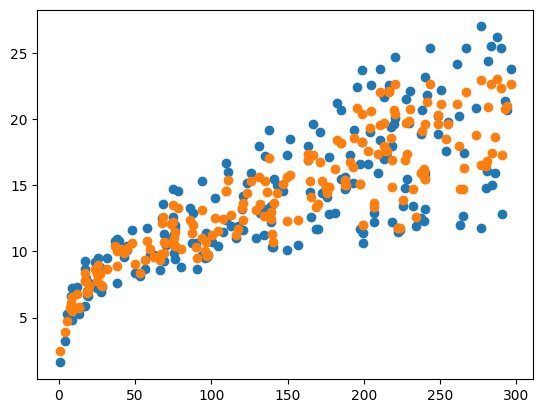

In [ ]:
plt.scatter(df['TV'], df['Sales'])
plt.scatter(df['TV'], preds)
plt.show()

The result indicates that the relationship between $X$ and $y$ is nonlinear based on the Random Forest.